# Análise exploratória inicial dos dados de Expectativa de Vida

Equipe: Avelar Hostalácio, Carolina Brandão, Daniel Andrade, Enzo Pierazolli, Iago Gabino

## Leitura inicial do dataset e correção de colunas

Substituindo a coluna Economy_status_Developed para 'developed' booleana:

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('Life-Expectancy-Data.csv')

dataset.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


Contando linhas e colunas:

In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

## Reorganizando os dados do banco de dados

Dropamos algumas colunas que consideramos irrelevantes pro projeto e renomeamos outras, para facilitar a visualização/manipulação posterior dos dados.

In [132]:
dataset.drop(['Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Economy_status_Developing'], axis=1, inplace=True)

In [133]:
##trocas developing e developed por true e false
dataset.rename(columns={'Economy_status_Developed':'developed'}, inplace=True)
dataset["developed"] = dataset["developed"].astype(bool)
dataset['developed'].unique()

array([False,  True])

In [134]:
# renomear colunas com nomes com letra minuscula e no formato nome_da_coluna
dataset.rename(columns={'Country':'country', 'Region':'region', 'Year':'year', 'Infant_deaths':'infant_deaths', 'Under_five_deaths':'under_five_deaths', 'Adult_mortality':'adult_mortality', 'Alcohol_consumption':'alcohol_consumption', 'Hepatitis_B':'hepatitis_b', 'Measles':'measles', 'BMI':'bmi', 'Polio':'polio', 'Diphtheria':'diphtheria', 'Incidents_HIV':'incidents_hiv', 'GDP_per_capita':'gdp_per_capita', 'Population_mln':'population_mln', 'Schooling':'schooling', 'Life_expectancy':'life_expectancy'}, inplace=True)

In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              2864 non-null   object 
 1   region               2864 non-null   object 
 2   year                 2864 non-null   int64  
 3   infant_deaths        2864 non-null   float64
 4   under_five_deaths    2864 non-null   float64
 5   adult_mortality      2864 non-null   float64
 6   alcohol_consumption  2864 non-null   float64
 7   hepatitis_b          2864 non-null   int64  
 8   measles              2864 non-null   int64  
 9   bmi                  2864 non-null   float64
 10  polio                2864 non-null   int64  
 11  diphtheria           2864 non-null   int64  
 12  incidents_hiv        2864 non-null   float64
 13  gdp_per_capita       2864 non-null   int64  
 14  population_mln       2864 non-null   float64
 15  schooling            2864 non-null   f

## Plots para análise inicial de dados

<Axes: xlabel='year', ylabel='life_expectancy'>

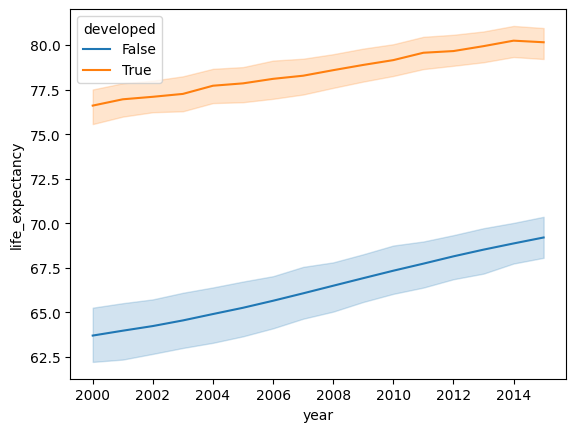

In [136]:
sns.lineplot(x = "year", y = "life_expectancy", hue = "developed", data = dataset)

<Axes: xlabel='year', ylabel='life_expectancy'>

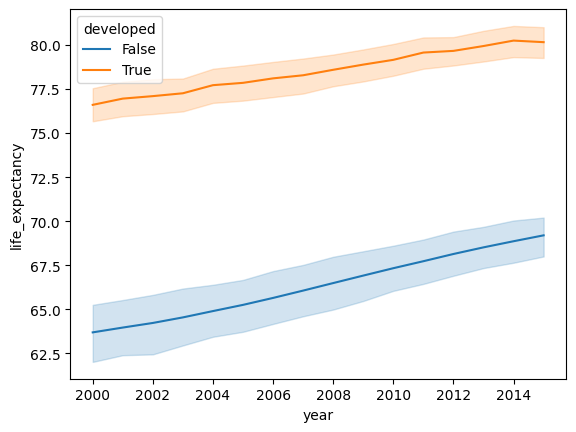

In [137]:
sns.lineplot(x = "year", y = "life_expectancy", hue = "developed", data = dataset)

<Axes: xlabel='year', ylabel='life_expectancy'>

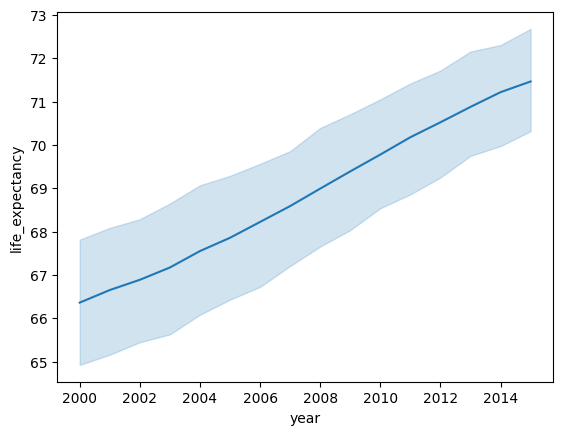

In [138]:
sns.lineplot(x = "year", y = "life_expectancy", data = dataset)

<Axes: xlabel='gdp_per_capita', ylabel='life_expectancy'>

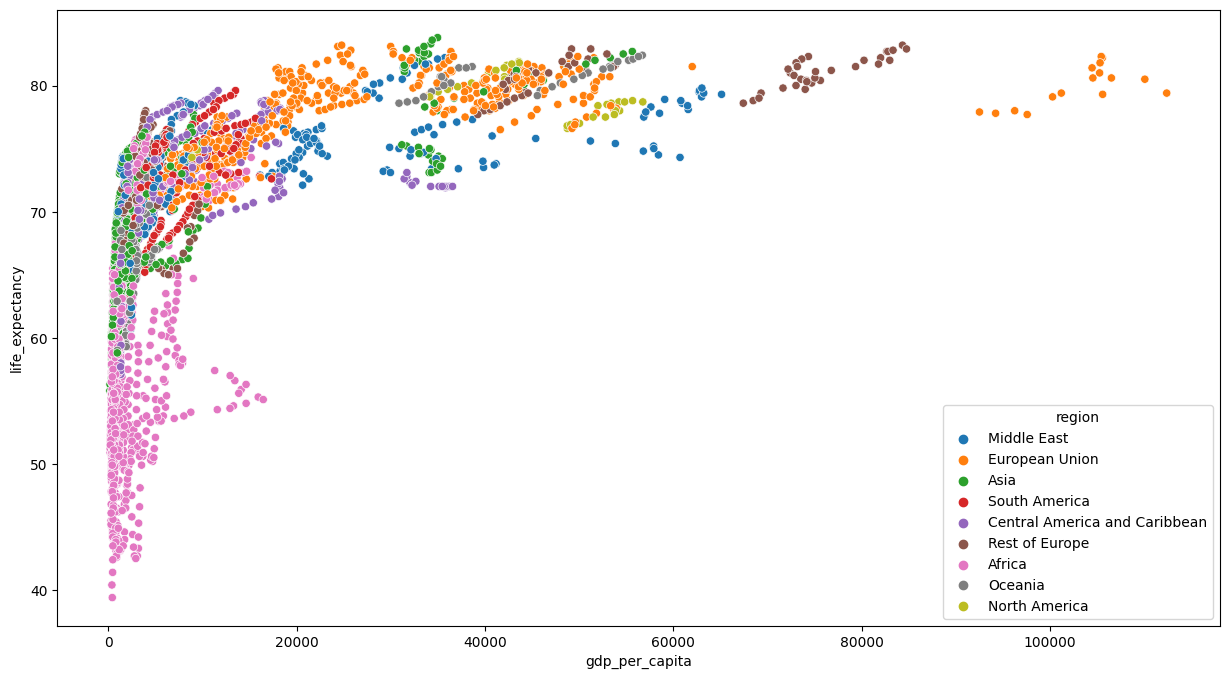

In [139]:
f, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x="gdp_per_capita", y="life_expectancy",hue="region", data= dataset)

<Axes: xlabel='life_expectancy', ylabel='Count'>

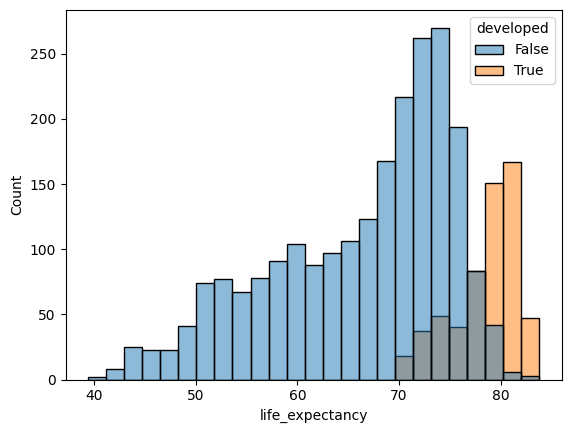

In [140]:
#plot an histogram
sns.histplot(x='life_expectancy', hue='developed', data=dataset)

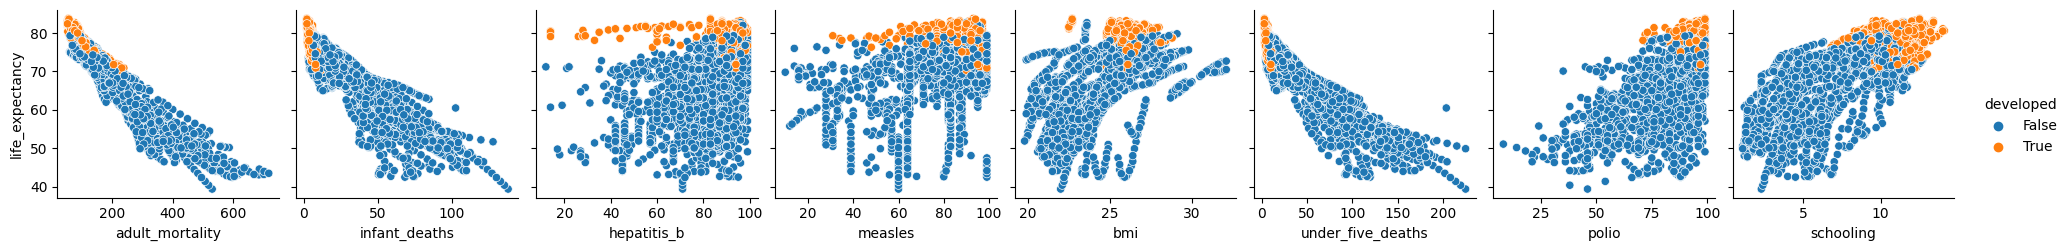

In [141]:
sns.pairplot(dataset, hue='developed', y_vars='life_expectancy', x_vars=['adult_mortality', 'infant_deaths', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'schooling'])
